## Import : data with actual stock distributed and exogenous variables 

In [95]:
import pandas as pd

df_combined=pd.read_csv('../0_data/df_combined_fullsample.csv')

## Import results from distribution(shares) models 

In [96]:
import glob
temp=glob.glob('../2_pipeline/final_distribute_*.csv')
print('\n importing results from the distribution stage of various aggregation levels \n')
print(temp)


 importing results from the distribution stage of various aggregation levels 

['../2_pipeline\\final_distribute_districtlev.csv', '../2_pipeline\\final_distribute_regionlev.csv', '../2_pipeline\\final_distribute_regionproducttypelev.csv']


In [97]:
distribute_districtlev=pd.read_csv('../2_pipeline\\final_distribute_districtlev.csv').drop(columns=['Unnamed: 0'])
distribute_regionlev=pd.read_csv('../2_pipeline\\final_distribute_regionlev.csv').drop(columns=['Unnamed: 0'])
distribute_regionproducttypelev=pd.read_csv('../2_pipeline\\final_distribute_regionproducttypelev.csv').drop(columns=['Unnamed: 0']) 

In [98]:
distribute_districtlev.describe()

,pred_share_districtlev
count,44504.000000
mean,0.329639
std,0.296856
min,0.000000
25%,0.081187
50%,0.215831
75%,0.624217
max,1.000000


In [99]:
distribute_regionlev.describe()

,pred_share_regionlev
count,44504.000000
mean,0.134986
std,0.170963
min,0.000000
25%,0.031491
50%,0.101163
75%,0.120171
max,1.000000


In [100]:
distribute_regionproducttypelev.describe()

,pred_share_regionproducttype_tlev
count,44504.000000
mean,0.081804
std,0.135923
min,0.000000
25%,0.011835
50%,0.047299
75%,0.078812
max,1.000000


## Import SARIMAX_agg model results and merge with distribute 

In [101]:
print('Import SARIMAX_agg model results and merge with predicted distribute values')

Import SARIMAX_agg model results and merge with predicted distribute values


In [102]:
sarimax_pred_region=pd.read_csv('../2_pipeline/final_pred_region_lev.csv').rename(columns={'Unnamed: 0':'date',}).rename(columns={'stock_distributed_forecasted':'stock_forecast_agg_region'})
sarimax_pred_regionproducttype=pd.read_csv('../2_pipeline/final_pred_region_producttype_lev.csv').rename(columns={'Unnamed: 0':'date'}).rename(columns={'stock_distributed_forecasted':'stock_forecast_agg_regionproducttype'})
sarimax_pred_district=pd.read_csv('../2_pipeline/final_pred_district_lev.csv').rename(columns={'Unnamed: 0':'date'}).rename(columns={'stock_distributed_forecasted':'stock_forecast_agg_district'})

In [103]:
sarimax_pred_region.describe()

,stock_forecast_agg_region
count,8493.000000
mean,75.651585
std,157.060071
min,-841.745126
25%,2.432710
50%,24.009434
75%,83.549213
max,3157.736225


In [104]:
sarimax_pred_regionproducttype.describe()

,stock_forecast_agg_regionproducttype
count,5521.000000
mean,123.847612
std,308.692461
min,-1182.403679
25%,1.334625
50%,38.488030
75%,132.581076
max,7824.049060


In [105]:
sarimax_pred_district.describe()

,stock_forecast_agg_district
count,24244.000000
mean,25.484855
std,58.788400
min,-701.290790
25%,0.984309
50%,7.996012
75%,25.745060
max,2978.486795


- merge sarimax_pred_region with distribute_region

In [106]:
pred_agg_region=pd.merge(left=sarimax_pred_region,right=distribute_regionlev,on=['date','region','product_code'],how='right')
pred_agg_region.describe()

,stock_forecast_agg_region,pred_share_regionlev
count,43540.000000,44504.000000
mean,159.861939,0.134986
std,250.937894,0.170963
min,-841.745126,0.000000
25%,13.673661,0.031491
50%,66.491899,0.101163
75%,177.306548,0.120171
max,3157.736225,1.000000


In [107]:
pred_agg_region.head(2)

,date,stock_forecast_agg_region,region,product_code,site_code,pred_share_regionlev,agg_level
0,2016-01-01,-0.121998,ABIDJAN 1-GRANDS PONTS,AS17005,C1062,0.002843,region
1,2016-01-01,-0.121998,ABIDJAN 1-GRANDS PONTS,AS17005,C1073,0.001395,region


- merge sarimax_pred_regionproducttype with distribute_regionproducttype

In [108]:
pred_agg_regionproducttype=pd.merge(left=sarimax_pred_regionproducttype,right=distribute_regionproducttypelev,on=['date','region','product_type'],how='right')
pred_agg_regionproducttype.describe()

,stock_forecast_agg_regionproducttype,pred_share_regionproducttype_tlev
count,43834.000000,44504.000000
mean,334.760378,0.081804
std,507.399018,0.135923
min,-1182.403679,0.000000
25%,44.503907,0.011835
50%,150.281406,0.047299
75%,402.166707,0.078812
max,7824.049060,1.000000


In [109]:
pred_agg_regionproducttype.head(1)

,date,stock_forecast_agg_regionproducttype,region,product_type,site_code,product_code,pred_share_regionproducttype_tlev,agg_level
0,2016-01-01,105.749324,ABIDJAN 1-GRANDS PONTS,Contraceptive Implant,C1062,AS27138,0.00795,regionproducttype


- merge sarimax_pred_district with distribute_districtlev

In [110]:
pred_agg_district=pd.merge(left=sarimax_pred_district,right=distribute_districtlev,on=['date','district','product_code'],how='right')
pred_agg_district.describe()

,stock_forecast_agg_district,pred_share_districtlev
count,41194.000000,44504.000000
mean,46.853299,0.329639
std,89.914054,0.296856
min,-701.290790,0.000000
25%,2.434515,0.081187
50%,15.643780,0.215831
75%,51.997820,0.624217
max,2978.486795,1.000000


In [111]:
pred_agg_district.head(1)

,date,stock_forecast_agg_district,district,product_code,site_code,pred_share_districtlev,agg_level
0,2016-01-01,9.792786,ABENGOUROU,AS27000,C4001,0.712982,district


## Import three individual level sarimax results 

In [112]:
import glob
temp=glob.glob('../2_pipeline/final_pred_ind*.csv')
print('\n Import three individual level sarimax results \n')
print(temp)


 Import three individual level sarimax results 

['../2_pipeline\\final_pred_ind_lev.csv', '../2_pipeline\\final_pred_ind_rollingsmoothed_lev.csv', '../2_pipeline\\final_pred_ind_winsorized_lev.csv']


In [113]:
sarimax_ind=pd.read_csv('../2_pipeline/final_pred_ind_lev.csv').rename(columns={'Unnamed: 0':'date','stock_distributed_forecasted':'stock_forecast_agg_ind'})
sarimax_ind.head(2)

,date,stock_forecast_agg_ind,site_code,product_code
0,2016-04-01,66.912062,C1007,AS27000
1,2016-05-01,15.091281,C1007,AS27000


In [114]:
sarimax_ind_smooth=pd.read_csv('../2_pipeline/final_pred_ind_rollingsmoothed_lev.csv').rename(columns={'Unnamed: 0':'date','stock_distributed_forecasted':'stock_forecast_agg_ind_smooth'})
sarimax_ind_smooth.head(2)

,date,stock_forecast_agg_ind_smooth,site_code,product_code
0,2016-04-01,85.588195,C1007,AS27000
1,2016-05-01,57.430206,C1007,AS27000


In [115]:
sarimax_ind_winsorized=pd.read_csv('../2_pipeline/final_pred_ind_winsorized_lev.csv').rename(columns={'Unnamed: 0':'date','stock_distributed_forecasted':'stock_forecast_agg_ind_winsorized'})

sarimax_ind_winsorized.head(2)

,date,stock_forecast_agg_ind_winsorized,site_code,product_code
0,2016-04-01,66.629251,C1007,AS27000
1,2016-05-01,16.178449,C1007,AS27000


In [116]:
df_combined.head(1)

,date,site_code,product_code,year,month,stock_distributed,region,district,regionroads,regionasphaltroads,...,maxtemp,pressure,relativehumidity,rainfallsnowmelt,visibility,windspeed,maxsustainedwindspeed,rainordrizzle,storm,fog
0,2019-04-01,C1004,AS21126,2019,4,0.0,AGNEBY-TIASSA-ME,AGBOVILLE,98.0,24.0,...,32.1,0.0,80.3,63.25,9.6,11.9,24.4,12.0,17.0,0.0


In [117]:
df_combined.columns

Index(['date', 'site_code', 'product_code', 'year', 'month',
       'stock_distributed', 'region', 'district', 'regionroads',
       'regionasphaltroads', 'regionearthroads', 'regionsurfacetreatmentroads',
       'regionpoorroads', 'poorroads', 'earthroads', 'asphaltroads',
       'site_type', 'product_type', 'temp', 'maxtemp', 'pressure',
       'relativehumidity', 'rainfallsnowmelt', 'visibility', 'windspeed',
       'maxsustainedwindspeed', 'rainordrizzle', 'storm', 'fog'],
      dtype='object')

In [118]:
pred_agg_district.head(2)

,date,stock_forecast_agg_district,district,product_code,site_code,pred_share_districtlev,agg_level
0,2016-01-01,9.792786,ABENGOUROU,AS27000,C4001,0.712982,district
1,2016-02-01,9.792786,ABENGOUROU,AS27000,C4001,0.704659,district


In [119]:
df_combined.head(1)

,date,site_code,product_code,year,month,stock_distributed,region,district,regionroads,regionasphaltroads,...,maxtemp,pressure,relativehumidity,rainfallsnowmelt,visibility,windspeed,maxsustainedwindspeed,rainordrizzle,storm,fog
0,2019-04-01,C1004,AS21126,2019,4,0.0,AGNEBY-TIASSA-ME,AGBOVILLE,98.0,24.0,...,32.1,0.0,80.3,63.25,9.6,11.9,24.4,12.0,17.0,0.0


In [120]:
df_ensemble=pd.merge(left=df_combined,right=pred_agg_region.drop(columns=['agg_level']),on=['date','region','product_code','site_code'],how='left')

In [121]:
len(df_ensemble)

44504

In [122]:
df_ensemble=pd.merge(left=df_ensemble,right=pred_agg_regionproducttype.drop(columns=['agg_level']),on=['date','region','product_type','site_code','product_code'],how='left')
len(df_ensemble)

44504

In [123]:
df_ensemble=pd.merge(left=df_ensemble,right=pred_agg_district.drop(columns=['agg_level']),on=['date','district','site_code','product_code'],how='left')

In [124]:
                     
df_ensemble=pd.merge(left=df_ensemble,right=sarimax_ind,on=['date','site_code','product_code'],how='left')

df_ensemble=pd.merge(left=df_ensemble,right=sarimax_ind_smooth,on=['date','site_code','product_code'],how='left')


df_ensemble=pd.merge(left=df_ensemble,right=sarimax_ind_winsorized,on=['date','site_code','product_code'],how='left')

In [125]:
df_ensemble.describe()

,year,month,stock_distributed,regionroads,regionasphaltroads,regionearthroads,regionsurfacetreatmentroads,regionpoorroads,poorroads,earthroads,...,fog,stock_forecast_agg_region,pred_share_regionlev,stock_forecast_agg_regionproducttype,pred_share_regionproducttype_tlev,stock_forecast_agg_district,pred_share_districtlev,stock_forecast_agg_ind,stock_forecast_agg_ind_smooth,stock_forecast_agg_ind_winsorized
count,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,...,44504.000000,43540.000000,44504.000000,43834.000000,44504.000000,41194.000000,44504.000000,37068.000000,37182.000000,36955.000000
mean,2017.627045,6.638841,13.038221,97.381154,12.278964,69.424538,15.677651,4.905678,0.459650,0.503956,...,1.313337,159.861939,0.134986,334.760378,0.081804,46.853299,0.329639,16.560963,16.690675,15.620388
std,1.095467,3.434310,38.266454,57.256750,9.988057,52.563144,10.757167,6.401357,0.498274,0.499889,...,2.861380,250.937894,0.170963,507.399018,0.135923,89.914054,0.296856,34.044841,35.317598,31.477509
min,2016.000000,1.000000,0.000000,15.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-841.745126,0.000000,-1182.403679,0.000000,-701.290790,0.000000,-498.534772,-274.960053,-504.804455
25%,2017.000000,4.000000,0.000000,72.000000,0.000000,34.000000,8.000000,0.000000,0.000000,0.000000,...,0.000000,13.673661,0.031491,44.503907,0.011835,2.434515,0.081187,1.187251,1.191303,1.095540
50%,2018.000000,7.000000,0.000000,80.000000,15.000000,56.000000,15.000000,0.000000,0.000000,1.000000,...,0.000000,66.491899,0.101163,150.281406,0.047299,15.643780,0.215831,6.374498,5.936767,5.941649
75%,2019.000000,10.000000,10.000000,131.000000,24.000000,96.000000,19.000000,9.000000,1.000000,1.000000,...,1.000000,177.306548,0.120171,402.166707,0.078812,51.997820,0.624217,18.812722,18.244548,17.517722
max,2019.000000,12.000000,1805.000000,206.000000,25.000000,184.000000,51.000000,19.000000,1.000000,1.000000,...,23.000000,3157.736225,1.000000,7824.049060,1.000000,2978.486795,1.000000,1336.247177,703.716403,997.320797


In [126]:
df_ensemble['date']=pd.to_datetime(df_ensemble['date'])

In [127]:
df_ensemble.set_index('date')['2019-10':].describe()

,year,month,stock_distributed,regionroads,regionasphaltroads,regionearthroads,regionsurfacetreatmentroads,regionpoorroads,poorroads,earthroads,...,fog,stock_forecast_agg_region,pred_share_regionlev,stock_forecast_agg_regionproducttype,pred_share_regionproducttype_tlev,stock_forecast_agg_district,pred_share_districtlev,stock_forecast_agg_ind,stock_forecast_agg_ind_smooth,stock_forecast_agg_ind_winsorized
count,3156.0,3156.000000,3156.0,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,...,3156.000000,3069.000000,3156.000000,3156.000000,3156.000000,3012.000000,3156.000000,2619.000000,2643.000000,2610.000000
mean,2019.0,11.000000,0.0,97.073467,12.420793,69.068961,15.583713,4.624937,0.454142,0.482912,...,1.767816,205.823472,0.135145,627.392326,0.076449,56.287631,0.348536,18.265577,18.644259,17.884570
std,0.0,0.816626,0.0,58.002963,10.074769,53.465181,10.489312,6.142992,0.496547,0.498358,...,3.792387,341.858744,0.146508,1187.468855,0.114441,156.848663,0.294072,42.073421,38.702243,47.417816
min,2019.0,10.000000,0.0,15.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-841.745126,0.000000,-1182.403679,0.000000,-701.290790,0.000000,-498.534772,-274.960053,-504.804455
25%,2019.0,10.000000,0.0,72.000000,0.000000,34.000000,8.000000,0.000000,0.000000,0.000000,...,0.000000,23.921875,0.041174,80.686994,0.012745,2.668198,0.091325,1.241874,1.765218,1.172845
50%,2019.0,11.000000,0.0,78.000000,15.000000,56.000000,15.000000,0.000000,0.000000,0.000000,...,0.000000,94.080756,0.101163,286.826624,0.046152,18.962782,0.272322,7.192807,7.429236,6.846924
75%,2019.0,12.000000,0.0,131.000000,24.000000,96.000000,19.000000,8.000000,1.000000,1.000000,...,1.313337,268.739553,0.137014,933.501934,0.078812,61.438287,0.686806,21.553683,20.898572,19.965443
max,2019.0,12.000000,0.0,206.000000,25.000000,184.000000,51.000000,19.000000,1.000000,1.000000,...,19.000000,3157.736225,1.000000,7824.049060,1.000000,2978.486795,1.000000,687.378415,559.897567,997.320797


In [128]:
df_ensemble=df_ensemble.fillna(0)

In [129]:
df_ensemble.describe()

,year,month,stock_distributed,regionroads,regionasphaltroads,regionearthroads,regionsurfacetreatmentroads,regionpoorroads,poorroads,earthroads,...,fog,stock_forecast_agg_region,pred_share_regionlev,stock_forecast_agg_regionproducttype,pred_share_regionproducttype_tlev,stock_forecast_agg_district,pred_share_districtlev,stock_forecast_agg_ind,stock_forecast_agg_ind_smooth,stock_forecast_agg_ind_winsorized
count,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,...,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000
mean,2017.627045,6.638841,13.038221,97.381154,12.278964,69.424538,15.677651,4.905678,0.459650,0.503956,...,1.313337,156.399174,0.134986,329.720618,0.081804,43.368569,0.329639,13.793856,13.944650,12.970776
std,1.095467,3.434310,38.266454,57.256750,9.988057,52.563144,10.757167,6.401357,0.498274,0.499889,...,2.861380,249.293790,0.170963,505.212336,0.135923,87.374851,0.296856,31.678943,32.869507,29.276744
min,2016.000000,1.000000,0.000000,15.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-841.745126,0.000000,-1182.403679,0.000000,-701.290790,0.000000,-498.534772,-274.960053,-504.804455
25%,2017.000000,4.000000,0.000000,72.000000,0.000000,34.000000,8.000000,0.000000,0.000000,0.000000,...,0.000000,11.327464,0.031491,40.445983,0.011835,0.960838,0.081187,0.000000,0.056436,0.000000
50%,2018.000000,7.000000,0.000000,80.000000,15.000000,56.000000,15.000000,0.000000,0.000000,1.000000,...,0.000000,63.911037,0.101163,146.769027,0.047299,12.679531,0.215831,3.782146,3.489416,3.450218
75%,2019.000000,10.000000,10.000000,131.000000,24.000000,96.000000,19.000000,9.000000,1.000000,1.000000,...,1.000000,173.151221,0.120171,385.870387,0.078812,47.038593,0.624217,15.248754,14.628769,14.025397
max,2019.000000,12.000000,1805.000000,206.000000,25.000000,184.000000,51.000000,19.000000,1.000000,1.000000,...,23.000000,3157.736225,1.000000,7824.049060,1.000000,2978.486795,1.000000,1336.247177,703.716403,997.320797


## Setting up train-and test set to do one more round of model testing

－ note, these df_test data contains columns from SARIMAX model results, so they do have look ahead issue and naturally will have a better error measure. 
-  The final model will take train with the combined df_train and df_test and use that to make prediction for the X values of df_pred 
-  the y vector should have all 0s for the last 3 months worth of data 

In [130]:
df_train=df_ensemble.set_index('date')[:'2019-6']
df_test=df_ensemble.set_index('date')['2019-7':'2019-9']
df_pred=df_ensemble.set_index('date')['2019-10':'2019-12']

In [131]:
y=df_ensemble.stock_distributed

In [132]:
df_ensemble.columns

Index(['date', 'site_code', 'product_code', 'year', 'month',
       'stock_distributed', 'region', 'district', 'regionroads',
       'regionasphaltroads', 'regionearthroads', 'regionsurfacetreatmentroads',
       'regionpoorroads', 'poorroads', 'earthroads', 'asphaltroads',
       'site_type', 'product_type', 'temp', 'maxtemp', 'pressure',
       'relativehumidity', 'rainfallsnowmelt', 'visibility', 'windspeed',
       'maxsustainedwindspeed', 'rainordrizzle', 'storm', 'fog',
       'stock_forecast_agg_region', 'pred_share_regionlev',
       'stock_forecast_agg_regionproducttype',
       'pred_share_regionproducttype_tlev', 'stock_forecast_agg_district',
       'pred_share_districtlev', 'stock_forecast_agg_ind',
       'stock_forecast_agg_ind_smooth', 'stock_forecast_agg_ind_winsorized'],
      dtype='object')

### Add a few interactions 

In [133]:
df_ensemble['rainfallsnowmelt'].describe()

count    44504.000000
mean        91.835005
std         90.878501
min          0.000000
25%         26.670000
50%         66.280000
75%        136.650000
max        870.200000
Name: rainfallsnowmelt, dtype: float64

In [134]:
df_ensemble['interaction_1']=df_ensemble['pred_share_regionlev']*df_ensemble['stock_forecast_agg_regionproducttype']
df_ensemble['interaction_2']=df_ensemble['pred_share_districtlev']*df_ensemble['stock_forecast_agg_regionproducttype']
df_ensemble['weather_interaction']=df_ensemble['maxtemp']*df_ensemble['rainfallsnowmelt']

In [135]:
columns_to_encode=['site_code', 'product_code', 'year', 'month',
       'region', 'district', 'product_type','site_type'] 
columns_continuous_exog=['regionroads',
       'regionasphaltroads', 'regionearthroads', 'regionsurfacetreatmentroads',
       'regionpoorroads', 'poorroads', 'earthroads', 'asphaltroads', 'temp',
       'maxtemp', 'pressure', 'relativehumidity', 'rainfallsnowmelt',
       'visibility', 'windspeed', 'maxsustainedwindspeed', 'rainordrizzle',
       'storm', 'fog','weather_interaction']

columns_continuous_frommodel=['stock_forecast_agg_region', 'pred_share_regionlev',
       'stock_forecast_agg_regionproducttype',
       'pred_share_regionproducttype_tlev', 'stock_forecast_agg_district',
       'pred_share_districtlev', 'stock_forecast_agg_ind',
       'stock_forecast_agg_ind_smooth', 'stock_forecast_agg_ind_winsorized','interaction_1','interaction_2']

### Very large variation especially these columns from model-  need scaling

In [136]:
df_ensemble[columns_continuous_frommodel].describe()

,stock_forecast_agg_region,pred_share_regionlev,stock_forecast_agg_regionproducttype,pred_share_regionproducttype_tlev,stock_forecast_agg_district,pred_share_districtlev,stock_forecast_agg_ind,stock_forecast_agg_ind_smooth,stock_forecast_agg_ind_winsorized,interaction_1,interaction_2
count,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000
mean,156.399174,0.134986,329.720618,0.081804,43.368569,0.329639,13.793856,13.944650,12.970776,30.370094,97.609965
std,249.293790,0.170963,505.212336,0.135923,87.374851,0.296856,31.678943,32.869507,29.276744,69.498990,216.771701
min,-841.745126,0.000000,-1182.403679,0.000000,-701.290790,0.000000,-498.534772,-274.960053,-504.804455,-479.859764,-872.870648
25%,11.327464,0.031491,40.445983,0.011835,0.960838,0.081187,0.000000,0.056436,0.000000,3.243691,4.905966
50%,63.911037,0.101163,146.769027,0.047299,12.679531,0.215831,3.782146,3.489416,3.450218,14.720974,39.451867
75%,173.151221,0.120171,385.870387,0.078812,47.038593,0.624217,15.248754,14.628769,14.025397,34.707427,117.578704
max,3157.736225,1.000000,7824.049060,1.000000,2978.486795,1.000000,1336.247177,703.716403,997.320797,3251.802793,6666.348154


In [137]:
# Import libraries and download example data
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False,categories='auto')
encoded_columns =  ohe.fit_transform(df_ensemble[columns_to_encode])
import numpy as np
np.shape(encoded_columns)

(44504, 294)

In [138]:
features=pd.DataFrame(data=encoded_columns,columns=ohe.get_feature_names(columns_to_encode))
features.describe()

,site_code_C1004,site_code_C1007,site_code_C1008,site_code_C1009,site_code_C1010,site_code_C1011,site_code_C1014,site_code_C1015,site_code_C1017,site_code_C1018,...,product_type_Contraceptive Implant,product_type_Emergency Contraceptive (Pill),product_type_Female Condom,product_type_Injectable Contraceptive,product_type_Intrauterine Device (IUD),product_type_Male Condom,product_type_Oral Contraceptive (Pill),site_type_Health Center,site_type_Hospital,site_type_University Hospital/National Institute
count,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,...,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000
mean,0.005191,0.009729,0.007235,0.003842,0.006314,0.007707,0.004786,0.010853,0.005123,0.009370,...,0.244158,0.066556,0.034581,0.292962,0.041008,0.055006,0.265729,0.295816,0.680928,0.023256
std,0.071859,0.098158,0.084753,0.061868,0.079211,0.087453,0.069017,0.103612,0.071393,0.096345,...,0.429592,0.249254,0.182719,0.455126,0.198310,0.227995,0.441726,0.456414,0.466122,0.150718
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [139]:
X=features
X[columns_continuous_exog]=df_ensemble[columns_continuous_exog]
X[columns_continuous_frommodel]=df_ensemble[columns_continuous_frommodel]

In [140]:
X_train=X[:df_train.shape[0]]

In [141]:
y_train=y[:df_train.shape[0]]

In [142]:
X_test=X[df_train.shape[0]+1:-df_test.shape[0]] # the first many months 
y_test=y[df_train.shape[0]+1:-df_test.shape[0]] # the last 3 months of known data ( 7,8,9)
X_pred=X[-df_pred.shape[0]:] # the last 3 months ( 10, 11, 12) , y value unknown 

In [143]:
X.head(1)

,site_code_C1004,site_code_C1007,site_code_C1008,site_code_C1009,site_code_C1010,site_code_C1011,site_code_C1014,site_code_C1015,site_code_C1017,site_code_C1018,...,pred_share_regionlev,stock_forecast_agg_regionproducttype,pred_share_regionproducttype_tlev,stock_forecast_agg_district,pred_share_districtlev,stock_forecast_agg_ind,stock_forecast_agg_ind_smooth,stock_forecast_agg_ind_winsorized,interaction_1,interaction_2
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.101163,485.549658,0.012269,0.0,0.0,0.0,0.0,0.0,49.119585,0.0


In [144]:
df_train.shape

(38245, 37)

In [145]:
df_test.shape

(3103, 37)

In [146]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [147]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=30,n_estimators=15,min_samples_leaf=0.0001,random_state=21)
regr.fit(X_train, y_train)
y_pred=regr.predict(X_test)
mse_dt=MSE(y_test,y_pred)
rmse_dt=mse_dt**(1/2)
print(rmse_dt)

26.383483165892375


In [148]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=30,n_estimators=15,min_samples_leaf=0.00008,random_state=21)
regr.fit(X_train, y_train)
y_pred=regr.predict(X_test)
mse_dt=MSE(y_test,y_pred)
rmse_dt=mse_dt**(1/2)
print(rmse_dt)

26.383483165892375


In [149]:
y_final_pred=regr.predict(X_pred)

In [150]:
y_final_pred

array([0.        , 0.        , 0.        , ..., 0.        , 2.28717172,
       0.        ])

In [151]:
len(y_final_pred)

3156

In [152]:
from scipy import stats
stats.describe(y_final_pred)

DescribeResult(nobs=3156, minmax=(0.0, 584.5822751322752), mean=18.180241989072908, variance=1435.3538025065973, skewness=6.542613114912307, kurtosis=69.72443546270596)

## XGBoost
 

In [153]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

## Scale X 

In [154]:
from sklearn.preprocessing import scale
Xs = scale(X) 

 ### XGBoost

In [155]:
Xs_train=Xs[:df_train.shape[0]]
Xs_test=Xs[df_train.shape[0]+1:-df_test.shape[0]]
Xs_pred=Xs[-df_pred.shape[0]:]

In [156]:
data_dmatrix = xgb.DMatrix(data=Xs,label=y)

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 30, alpha = 10, n_estimators = 20)
xg_reg.fit(Xs_train,y_train)

preds = xg_reg.predict(Xs_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 25.985151


params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 30, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

cv_results.tail()

In [157]:
preds = xg_reg.predict(Xs_pred)

In [158]:
preds

array([0.81931573, 0.8554795 , 0.7437669 , ..., 8.17897   , 8.6429825 ,
       8.21501   ], dtype=float32)

In [159]:
len(preds)

3156

In [160]:
from scipy import stats
stats.describe(preds)

DescribeResult(nobs=3156, minmax=(-0.2970662, 332.7301), mean=14.642935, variance=747.5111, skewness=5.032627105712891, kurtosis=37.10469015797684)

### Scaled Random Forest

In [161]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=30,n_estimators=15,min_samples_leaf=0.0002,random_state=21)
regr.fit(Xs_train,y_train)
y_pred=regr.predict(Xs_test)
mse_dt=MSE(y_test,y_pred)
rmse_dt=mse_dt**(1/2)
print(rmse_dt)

28.08635640278164


# Use Random Forest to make final prediction

In [162]:
df_train=df_ensemble.set_index('date')[:'2019-9'] 
df_pred=df_ensemble.set_index('date')['2019-10':'2019-12'] 
Xs_train=Xs[:df_train.shape[0]]
y_train=y[:df_train.shape[0]]
Xs_pred=Xs[-df_pred.shape[0]:]

In [163]:
len(Xs_train)

41348

In [164]:
len(Xs_pred)

3156

In [165]:
regr = RandomForestRegressor(max_depth=30,n_estimators=15,min_samples_leaf=0.0002,random_state=21)
regr.fit(Xs_train,y_train)
y_pred=regr.predict(Xs_pred)

In [166]:
df_pred.describe()

,year,month,stock_distributed,regionroads,regionasphaltroads,regionearthroads,regionsurfacetreatmentroads,regionpoorroads,poorroads,earthroads,...,stock_forecast_agg_regionproducttype,pred_share_regionproducttype_tlev,stock_forecast_agg_district,pred_share_districtlev,stock_forecast_agg_ind,stock_forecast_agg_ind_smooth,stock_forecast_agg_ind_winsorized,interaction_1,interaction_2,weather_interaction
count,3156.0,3156.000000,3156.0,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,...,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000
mean,2019.0,11.000000,0.0,97.073467,12.420793,69.068961,15.583713,4.624937,0.454142,0.482912,...,627.392326,0.076449,53.719374,0.348536,15.157651,15.613681,14.790471,74.153142,211.686922,1748.298317
std,0.0,0.816626,0.0,58.002963,10.074769,53.465181,10.489312,6.142992,0.496547,0.498358,...,1187.468855,0.114441,153.677110,0.294072,38.935877,36.078330,43.647605,203.759675,602.919216,1788.101317
min,2019.0,10.000000,0.0,15.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,-1182.403679,0.000000,-701.290790,0.000000,-498.534772,-274.960053,-504.804455,-479.859764,-872.870648,0.000000
25%,2019.0,10.000000,0.0,72.000000,0.000000,34.000000,8.000000,0.000000,0.000000,0.000000,...,80.686994,0.012745,1.463547,0.091325,0.000000,0.191921,0.000000,6.816370,8.462340,32.623000
50%,2019.0,11.000000,0.0,78.000000,15.000000,56.000000,15.000000,0.000000,0.000000,0.000000,...,286.826624,0.046152,16.928672,0.272322,4.169164,4.759881,3.920812,23.522696,63.645124,1256.220000
75%,2019.0,12.000000,0.0,131.000000,24.000000,96.000000,19.000000,8.000000,1.000000,1.000000,...,933.501934,0.078812,58.464579,0.686806,17.068424,17.338478,15.638337,59.794415,187.705327,2893.676179
max,2019.0,12.000000,0.0,206.000000,25.000000,184.000000,51.000000,19.000000,1.000000,1.000000,...,7824.049060,1.000000,2978.486795,1.000000,687.378415,559.897567,997.320797,3251.802793,6666.348154,7126.280000


In [167]:
temp=df_pred[['year','month','site_code','product_code']].copy()

In [168]:
temp['predicted_value']=y_pred

In [169]:
temp=temp.reset_index()

In [170]:
temp.drop(columns='date',inplace=True)

In [171]:
temp.head(2)

,year,month,site_code,product_code,predicted_value
0,2019,10,C1004,AS21126,0.0
1,2019,11,C1004,AS21126,0.0


In [172]:
submission_format=pd.read_csv('../0_data/submission_format.csv')

In [173]:
submission_format.head()

,year,month,site_code,product_code,predicted_value
0,2019,10,C4001,AS27134,0
1,2019,10,C4001,AS27132,0
2,2019,10,C4001,AS27000,0
3,2019,10,C4001,AS27137,0
4,2019,10,C4001,AS27138,0


In [174]:
submission=pd.merge(left=submission_format.drop(columns='predicted_value'),right=temp,on=['year','month','site_code','product_code'],how='left')

In [175]:
submission.head()

,year,month,site_code,product_code,predicted_value
0,2019,10,C4001,AS27134,52.059133
1,2019,10,C4001,AS27132,0.992015
2,2019,10,C4001,AS27000,17.390988
3,2019,10,C4001,AS27137,3.561886
4,2019,10,C4001,AS27138,1.945005


In [176]:
submission.describe()

,year,month,predicted_value
count,3115.0,3115.000000,3115.000000
mean,2019.0,10.996469,17.627197
std,0.0,0.816686,33.148268
min,2019.0,10.000000,0.000000
25%,2019.0,10.000000,0.403695
50%,2019.0,11.000000,5.908355
75%,2019.0,12.000000,20.145594
max,2019.0,12.000000,495.274621


In [177]:
submission.to_csv('../submission.csv')

# Use XGboost to make final prediction

In [178]:
df_train=df_ensemble.set_index('date')[:'2019-9'] 
df_pred=df_ensemble.set_index('date')['2019-10':'2019-12'] 
Xs_train=Xs[:df_train.shape[0]]
y_train=y[:df_train.shape[0]]
Xs_pred=Xs[-df_pred.shape[0]:]


data_dmatrix = xgb.DMatrix(data=Xs,label=y)

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 30, alpha = 10, n_estimators = 20)
xg_reg.fit(Xs_train,y_train)

preds = xg_reg.predict(Xs_pred)


In [179]:
len(preds)

3156

In [180]:
import matplotlib.pyplot as plt
%matplotlib inline



In [181]:
df_train=df_ensemble.set_index('date')[:'2019-9'] 
df_pred=df_ensemble.set_index('date')['2019-10':'2019-12'] 
X_train=X[:df_train.shape[0]]
y_train=y[:df_train.shape[0]]
X_pred=X[-df_pred.shape[0]:]


data_dmatrix = xgb.DMatrix(data=Xs,label=y)

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 30, alpha = 10, n_estimators = 20)
xg_reg.fit(X_train,y_train)



XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=30,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

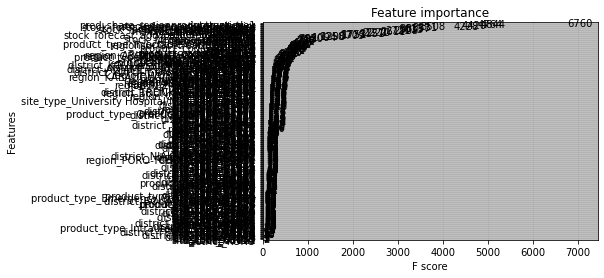

In [182]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [8,10]
plt.savefig('../2_pipeline/xgboost_plot_importance.jpg')
plt.show()